<a href="https://www.kaggle.com/code/rubanzasilva/s5e7-fastai-gradient-boosting?scriptVersionId=250740584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Personality Type Binary Classification

Our goal for this competition is to predict whether a person is an Introvert or Extrovert, given their social behavior and personality traits.

## Data & Library Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
#from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [4]:
#torch.manual_seed(42)

In [5]:
path = Path('/kaggle/input/playground-series-s5e7/')
path

Path('/kaggle/input/playground-series-s5e7')

In [6]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')
#original_df = pd.read_csv('/kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')

In [7]:
#train_df.shape,original_df.shape

In [8]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

## Exploratory Data Analysis

In [9]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


## Data Pre-processing with fast.ai

The `RandomSplitter` function below separates the training set into a training and validation set based on the value of the argument `valid_pct`.

In [10]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [11]:
#I decided to put concat the original df and the train df after doing the split so that validation can be done on the competition dataset only.
#train_df = pd.concat([train_df, original_df], ignore_index=True)
#train_df = pd.concat(objs=[train_df, original_df])

Below, we are going to prepare our data for machine learning.

First, we define the categorical and continuous variables. I use the fastai `cont_cat_split` function to separate my dataset variables into categorical and continuous variables based on the cardinality of my column values.

`cont_cat_split` takes an argument,`max_card` whose default value is 20. If the number of unique values is above 20 (the default `max_card` value) for a particular column, that column is considered continuous, and vice versa.

Define a `TabularPandas` object. Here we define the continuous and categorical columns, the dataset splitting strategy, preprocessing steps to apply to our datasets, the dependent variable, which is what we are predicting, and the type of problem we are optimizing for, such as binary classification in this case.

I then create and define a `dataloaders` object, which prepares the data for input into our neural network. Here, we also define our batch size.

In [12]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='Personality')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='Personality',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Finally, I extract the training and validation sets plus their values.

In [13]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

### Define Model Parameters

In [14]:
xgb_params = {'seed':42}
lgbm_params = {'seed':42}
cat_params = {'random_seed':42}
rf_params = {'random_state':42}

#### Cross Validation Function

In [15]:
def cross_val_predict(model_class, model_params=None, n_splits=5, random_state=42):
    if model_params is None:
        model_params = {}
    """
    Perform cross-validation using the fixed dataset and return predictions and scores.
    
    Parameters:
    - model_class: the model class (e.g., xgb.XGBClassifier)
    - model_params: dictionary of model parameters
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - submission_predictions: predictions on test_dl.xs
    - mean_score: mean accuracy score across folds
    - fold_scores: list of scores for each fold
    """
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    oof_predictions = np.zeros(len(X_train))  # Array for OOF predictions
    submission_predictions = np.zeros(len(test_dl.xs))  # Array for test predictions
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Initialize and train model on current fold
        model_fold = model_class(**model_params)
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions
        y_pred_fold = model_fold.predict(X_fold_val)
        
        # Store OOF predictions
        oof_predictions[val_index] = y_pred_fold
        
        # Get and accumulate test predictions
        submission_predictions += model_fold.predict(test_dl.xs) / n_splits
        
        # Calculate and store score
        cv_score = accuracy_score(y_fold_val, y_pred_fold)
        #cv_score = score(y_fold_val, y_pred_fold)
        fold_scores.append(cv_score)
        
        print(f"Fold {fold} AUC: {cv_score:.6f}")
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    print(f"\nMean AUC: {mean_score:.6f}")
    
    return oof_predictions, submission_predictions, mean_score, fold_scores

# Usage example:
#oof_preds, submission_preds, mean_score, fold_scores = cross_val_predict(
    #model_class=xgb.XGBClassifier
#)

# Create submission file
#submission_df = pd.DataFrame({
    #'id': test_df.index,  # adjust if you have different id column
    #'Depression': submission_preds
#})
#submission_df.to_csv('submission.csv', index=False)

# You can also analyze OOF predictions
#print("\nOOF Predictions Score:", accuracy_score(y_train, oof_preds))

## Deep learning - Neural Networks¶

In [16]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0012022644514217973)

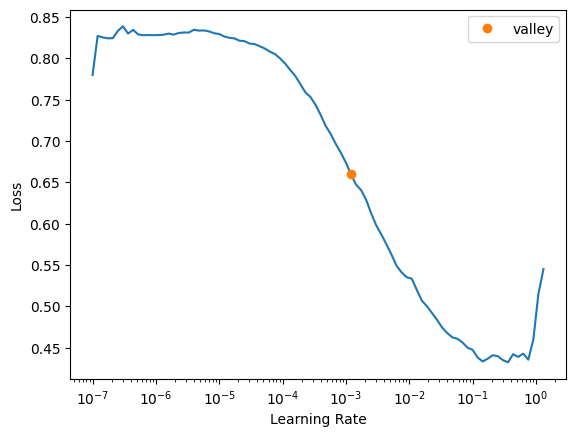

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(30, 2.089e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.214881,0.160017,0.973542,00:02
1,0.184302,0.144631,0.975432,00:02
2,0.158882,0.119342,0.975702,00:02
3,0.139285,0.111050,0.976242,00:02
4,0.144110,0.110383,0.975972,00:02
5,0.139845,0.111909,0.976242,00:02
6,0.125474,0.109453,0.975702,00:02
7,0.138208,0.110308,0.975972,00:02
8,0.146901,0.110189,0.975972,00:02
9,0.136199,0.107808,0.975702,00:02


In [19]:
dl = test_dl

In [20]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [21]:
#learn.load('nn_pnality_tp_pd')  

In [22]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [23]:
a_preds.shape

torch.Size([6175, 2])

In [24]:
nn_preds_y.shape,sub_df.shape

(torch.Size([6175, 2]), (6175, 2))

In [25]:
nn_preds_x

tensor([[0.9477, 0.0523],
        [0.9783, 0.0217],
        [0.0613, 0.9387],
        ...,
        [0.9873, 0.0127],
        [0.9631, 0.0369],
        [0.9982, 0.0018]])

In [26]:
nn_preds_y

tensor([[0.9958, 0.0042],
        [0.0394, 0.9606],
        [0.9667, 0.0333],
        ...,
        [0.9973, 0.0027],
        [0.9947, 0.0053],
        [0.0226, 0.9774]])

In [27]:
final_preds = torch.round(a_preds).long()
final_preds = final_preds[:,1]
final_preds

tensor([0, 1, 0,  ..., 0, 0, 1])

In [28]:
final_preds.shape

torch.Size([6175])

In [29]:
mapping = dict(enumerate(dls.vocab))
mapping

{0: 'Extrovert', 1: 'Introvert'}

In [30]:
mapping = dict(enumerate(dls.vocab))
submit = pd.read_csv(path/'sample_submission.csv')
submit['Personality'] = [mapping[pred.item()] for pred in final_preds]
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
print(sub)

      Personality
id               
18524   Extrovert
18525   Introvert
18526   Extrovert
18527   Extrovert
18528   Introvert
...           ...
24694   Extrovert
24695   Introvert
24696   Extrovert
24697   Extrovert
24698   Introvert

[6175 rows x 1 columns]


In [31]:
#!rm submission.csv
#sub_df['Personality'] = final_preds
#sub_df.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='Id')
#sub

## Gradient Boosting

### Random Forest

In [32]:
%%time
rf = RandomForestClassifier(1000, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_x = tensor(rf_model.predict(X_test))

rf_score = accuracy_score(y_test,rf_preds_x)
rf_score

CPU times: user 9.1 s, sys: 81.1 ms, total: 9.18 s
Wall time: 9.17 s


0.9759719222462203

In [33]:
rf_preds

tensor([0, 1, 0,  ..., 0, 0, 1], dtype=torch.int8)

In [34]:
rf_oof_preds, rf_submission_preds, rf_mean_score, rf_fold_scores = cross_val_predict(
    model_class=RandomForestClassifier
)

Fold 1 AUC: 0.967274
Fold 2 AUC: 0.969973
Fold 3 AUC: 0.963900
Fold 4 AUC: 0.964575
Fold 5 AUC: 0.964912

Mean AUC: 0.966127


In [35]:
rf_oof_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
rf_submission_preds = torch.round(torch.tensor(rf_submission_preds)).long()
rf_submission_preds

tensor([0, 1, 0,  ..., 0, 0, 1])

In [37]:
 rf_mean_score

0.9661268556005398

In [38]:
rf_fold_scores

[0.9672739541160594,
 0.9699730094466936,
 0.9639001349527665,
 0.9645748987854251,
 0.9649122807017544]

In [39]:
rf_oof_preds.shape, rf_submission_preds.shape, rf_mean_score

((14820,), torch.Size([6175]), 0.9661268556005398)

#### Random forest feature importance

In [40]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=True)

In [41]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]
fi

,cols,imp
5,Friends_circle_size_na,0.000579
4,Going_outside_na,0.000840
6,Post_frequency_na,0.000932
3,Social_event_attendance_na,0.001029
2,Time_spent_Alone_na,0.001041
10,Friends_circle_size,0.051766
11,Post_frequency,0.104379
8,Social_event_attendance,0.112589
9,Going_outside,0.128080
7,Time_spent_Alone,0.159412


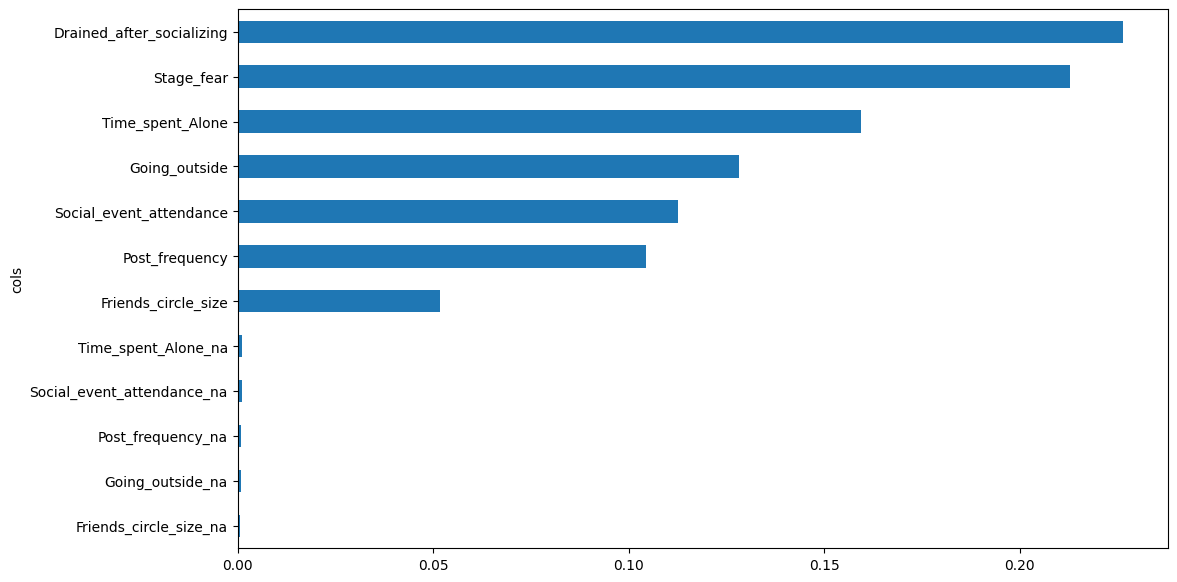

In [42]:
#feature importance visualization
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

In [43]:
#!rm submission.csv
#mapping = dict(enumerate(dls.vocab))
#submit = pd.read_csv(path/'sample_submission.csv')
#submit['Personality'] = [mapping[pred.item()] for pred in rf_preds]
#submit.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#print(sub)

### XGBoost

##### Single Fold¶

In [44]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))

xgb_preds_x = tensor(xgb_model.predict(X_test))

xgb_score = accuracy_score(y_test,xgb_preds_x)
xgb_score

CPU times: user 255 ms, sys: 7.04 ms, total: 262 ms
Wall time: 151 ms


0.974622030237581

In [45]:
xgb_oof_preds, xgb_submission_preds, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model_class=xgb.XGBClassifier
)

Fold 1 AUC: 0.966937
Fold 2 AUC: 0.969636
Fold 3 AUC: 0.962213
Fold 4 AUC: 0.961876
Fold 5 AUC: 0.963225

Mean AUC: 0.964777


In [46]:
xgb_oof_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
xgb_submission_preds = torch.round(torch.tensor(xgb_submission_preds)).long()
xgb_submission_preds

tensor([0, 1, 0,  ..., 0, 0, 1])

In [48]:
xgb_mean_score,xgb_fold_scores

(0.9647773279352225,
 [0.9669365721997301,
  0.9696356275303644,
  0.9622132253711201,
  0.9618758434547908,
  0.963225371120108])

In [49]:
xgb_oof_preds.shape, xgb_submission_preds.shape, xgb_mean_score
#fold_scores.shape

((14820,), torch.Size([6175]), 0.9647773279352225)

In [50]:
#!rm submission.csv
##mapping = dict(enumerate(dls.vocab))
#submit = pd.read_csv(path/'sample_submission.csv')
#submit['Personality'] = [mapping[pred.item()] for pred in xgb_preds]
#submit.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#print(sub)

### LGBM

In [51]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
#lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))

lgbm_preds_x = tensor(lgbm_model.predict(X_test))

lgbm_score = accuracy_score(y_test,lgbm_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 3879, number of negative: 10941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 14820, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261741 -> initscore=-1.036940
[LightGBM] [Info] Start training from score -1.036940
CPU times: user 298 ms, sys: 7.85 ms, total: 306 ms
Wall time: 184 ms


0.9757019438444925

In [52]:
lgbm_oof_preds, lgbm_submission_preds, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model_class=lgb.LGBMClassifier
)

[LightGBM] [Info] Number of positive: 3103, number of negative: 8753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 11856, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261724 -> initscore=-1.037027
[LightGBM] [Info] Start training from score -1.037027
Fold 1 AUC: 0.967611
[LightGBM] [Info] Number of positive: 3103, number of negative: 8753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 11856, number of used features: 12
[Ligh

In [53]:
lgbm_oof_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
lgbm_submission_preds = torch.round(torch.tensor(lgbm_submission_preds)).long()
lgbm_submission_preds

tensor([0, 1, 0,  ..., 0, 0, 1])

In [55]:
lgbm_mean_score,lgbm_fold_scores

(0.9668016194331983,
 [0.9676113360323887,
  0.970310391363023,
  0.9642375168690959,
  0.9652496626180836,
  0.9665991902834008])

In [56]:
lgbm_oof_preds.shape, lgbm_submission_preds.shape, lgbm_mean_score

((14820,), torch.Size([6175]), 0.9668016194331983)

In [57]:
%%time
K_FOLDS = 10
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
lgb_fold_scores = []

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    lgb_model_fold = lgb.LGBMClassifier()
    lgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict on validation set
    y_pred_fold = lgb_model_fold.predict(X_fold_val)
    y_pred_fold_tt = lgb_model_fold.predict(test_dl.xs)
    
    # Calculate accuracy score
    lgb_cv_score = accuracy_score(y_fold_val, lgb_model_fold.predict(X_fold_val))
    lgb_fold_scores.append(lgb_cv_score)
    
    print(f"Fold {fold} AUC: {lgb_cv_score}")

lgb_mean_score = np.mean(lgb_fold_scores)
print(f"Mean AUC: {lgb_mean_score}")

[LightGBM] [Info] Number of positive: 3491, number of negative: 9847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 13338, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261733 -> initscore=-1.036979
[LightGBM] [Info] Start training from score -1.036979
Fold 1 AUC: 0.9662618083670715
[LightGBM] [Info] Number of positive: 3491, number of negative: 9847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 13338, number of used features

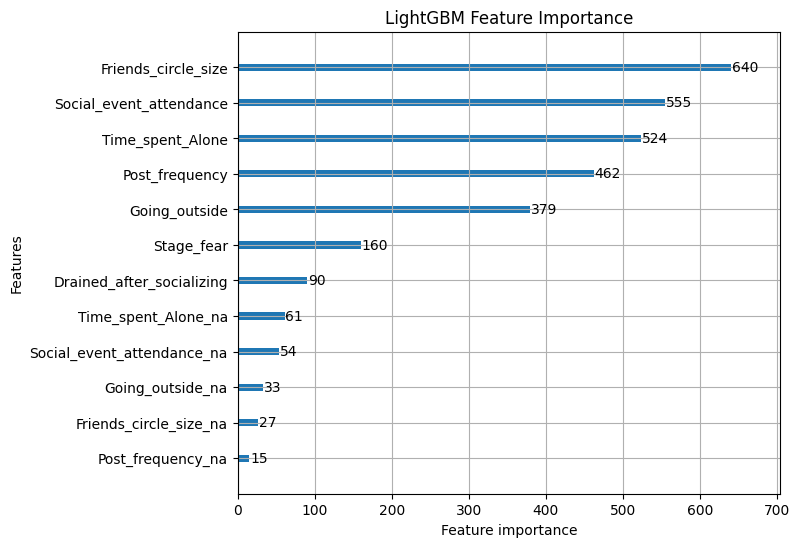

In [58]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

In [59]:
#!rm submission.csv
#mapping = dict(enumerate(dls.vocab))
#submit = pd.read_csv(path/'sample_submission.csv')
#submit['Personality'] = [mapping[pred.item()] for pred in lgbm_preds]
#submit.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#print(sub)

### CatBoost

In [60]:
%%time
#using full ds
cat_model_params = CatBoostClassifier()
cat_model_params = cat_model_params.fit(X_train, y_train, verbose=False)


cat_preds_params = tensor(cat_model_params.predict(test_dl.xs))

cat_preds_x_params = tensor(cat_model_params.predict(X_test))

cat_score_params = accuracy_score(y_test,cat_preds_x_params)
cat_score_params

CPU times: user 12.3 s, sys: 2.29 s, total: 14.6 s
Wall time: 3.82 s


0.9754319654427646

In [61]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, verbose=False)


cat_preds = tensor(cat_model.predict(test_dl.xs))

cat_preds_x = tensor(cat_model.predict(X_test))

cat_score = accuracy_score(y_test,cat_preds_x)
cat_score

CPU times: user 12.4 s, sys: 2.28 s, total: 14.7 s
Wall time: 3.73 s


0.9754319654427646

In [62]:
cat_oof_preds_y, cat_submission_preds_y, cat_mean_score_y, cat_fold_scores_y = cross_val_predict(
    model_class=CatBoostClassifier,
    
)

Learning rate set to 0.029615
0:	learn: 0.6459432	total: 4.45ms	remaining: 4.44s
1:	learn: 0.6026363	total: 7.32ms	remaining: 3.65s
2:	learn: 0.5639062	total: 10.6ms	remaining: 3.51s
3:	learn: 0.5273258	total: 13.6ms	remaining: 3.4s
4:	learn: 0.4945284	total: 16.6ms	remaining: 3.31s
5:	learn: 0.4644658	total: 19.7ms	remaining: 3.27s
6:	learn: 0.4371140	total: 22.8ms	remaining: 3.23s
7:	learn: 0.4121058	total: 25.6ms	remaining: 3.17s
8:	learn: 0.3894322	total: 28.7ms	remaining: 3.16s
9:	learn: 0.3693663	total: 31.8ms	remaining: 3.15s
10:	learn: 0.3510716	total: 34.7ms	remaining: 3.12s
11:	learn: 0.3342021	total: 37.8ms	remaining: 3.11s
12:	learn: 0.3187575	total: 40.2ms	remaining: 3.05s
13:	learn: 0.3041612	total: 43.5ms	remaining: 3.06s
14:	learn: 0.2904745	total: 46.7ms	remaining: 3.06s
15:	learn: 0.2784979	total: 49.5ms	remaining: 3.04s
16:	learn: 0.2674228	total: 52.6ms	remaining: 3.04s
17:	learn: 0.2573393	total: 55ms	remaining: 3s
18:	learn: 0.2480654	total: 58.4ms	remaining: 3.01

In [63]:
cat_score_params,cat_score

(0.9754319654427646, 0.9754319654427646)

In [64]:
cat_oof_preds, cat_submission_preds, cat_mean_score, cat_fold_scores = cross_val_predict(
    model_class=CatBoostClassifier
)

Learning rate set to 0.029615
0:	learn: 0.6459432	total: 4.25ms	remaining: 4.25s
1:	learn: 0.6026363	total: 7.44ms	remaining: 3.71s
2:	learn: 0.5639062	total: 10.9ms	remaining: 3.63s
3:	learn: 0.5273258	total: 14.3ms	remaining: 3.57s
4:	learn: 0.4945284	total: 17.5ms	remaining: 3.48s
5:	learn: 0.4644658	total: 21ms	remaining: 3.49s
6:	learn: 0.4371140	total: 24.3ms	remaining: 3.45s
7:	learn: 0.4121058	total: 27.5ms	remaining: 3.41s
8:	learn: 0.3894322	total: 31.1ms	remaining: 3.43s
9:	learn: 0.3693663	total: 34.5ms	remaining: 3.42s
10:	learn: 0.3510716	total: 37.7ms	remaining: 3.39s
11:	learn: 0.3342021	total: 41.2ms	remaining: 3.39s
12:	learn: 0.3187575	total: 43.9ms	remaining: 3.33s
13:	learn: 0.3041612	total: 50.1ms	remaining: 3.53s
14:	learn: 0.2904745	total: 53.7ms	remaining: 3.53s
15:	learn: 0.2784979	total: 57ms	remaining: 3.5s
16:	learn: 0.2674228	total: 60.5ms	remaining: 3.5s
17:	learn: 0.2573393	total: 63.2ms	remaining: 3.45s
18:	learn: 0.2480654	total: 66.9ms	remaining: 3.46

In [65]:
cat_oof_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
cat_submission_preds = torch.round(torch.tensor(cat_submission_preds)).long()
cat_submission_preds

tensor([0, 1, 0,  ..., 0, 0, 1])

In [67]:
cat_mean_score,cat_mean_score_y

(0.966059379217274, 0.966059379217274)

In [68]:
cat_mean_score,cat_mean_score_y

(0.966059379217274, 0.966059379217274)

In [69]:
cat_oof_preds.shape, cat_submission_preds.shape, cat_mean_score

((14820,), torch.Size([6175]), 0.966059379217274)

In [70]:
%%time
K_FOLDS = 10
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
cat_fold_scores = []

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    cat_model_fold = CatBoostClassifier()
    cat_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict on validation set
    y_pred_fold = cat_model_fold.predict(X_fold_val)
    y_pred_fold_tt = cat_model_fold.predict(test_dl.xs)
    
    # Calculate accuracy score
    cat_cv_score = accuracy_score(y_fold_val, cat_model_fold.predict(X_fold_val))
    cat_fold_scores.append(cat_cv_score)
    
    print(f"Fold {fold} AUC: {cat_cv_score}")

catboost_mean_score = np.mean(cat_fold_scores)
print(f"Mean AUC: {catboost_mean_score}")

Learning rate set to 0.031142
0:	learn: 0.6434122	total: 4.03ms	remaining: 4.03s
1:	learn: 0.5981024	total: 7.11ms	remaining: 3.55s
2:	learn: 0.5576481	total: 10.3ms	remaining: 3.42s
3:	learn: 0.5198624	total: 13.6ms	remaining: 3.4s
4:	learn: 0.4859868	total: 16.9ms	remaining: 3.35s
5:	learn: 0.4551555	total: 20ms	remaining: 3.31s
6:	learn: 0.4271836	total: 23ms	remaining: 3.27s
7:	learn: 0.4017726	total: 26ms	remaining: 3.23s
8:	learn: 0.3787425	total: 29.2ms	remaining: 3.22s
9:	learn: 0.3585247	total: 32.4ms	remaining: 3.21s
10:	learn: 0.3401180	total: 35.2ms	remaining: 3.17s
11:	learn: 0.3230980	total: 38.6ms	remaining: 3.18s
12:	learn: 0.3077598	total: 41.3ms	remaining: 3.13s
13:	learn: 0.2933741	total: 44.6ms	remaining: 3.14s
14:	learn: 0.2799299	total: 47.9ms	remaining: 3.14s
15:	learn: 0.2682183	total: 50.6ms	remaining: 3.11s
16:	learn: 0.2574540	total: 54ms	remaining: 3.13s
17:	learn: 0.2476847	total: 56.5ms	remaining: 3.08s
18:	learn: 0.2387261	total: 59.8ms	remaining: 3.09s
1

In [71]:
feature_importance = cat_model.get_feature_importance()
feature_names = train_df.columns

# Display feature importance
for name, importance in zip(feature_names, feature_importance):
    print(f"Feature: {name}, Importance: {importance:.2f}")

Feature: Time_spent_Alone, Importance: 7.36
Feature: Stage_fear, Importance: 8.30
Feature: Social_event_attendance, Importance: 2.86
Feature: Going_outside, Importance: 1.94
Feature: Drained_after_socializing, Importance: 1.42
Feature: Friends_circle_size, Importance: 0.56
Feature: Post_frequency, Importance: 0.53
Feature: Personality, Importance: 14.82


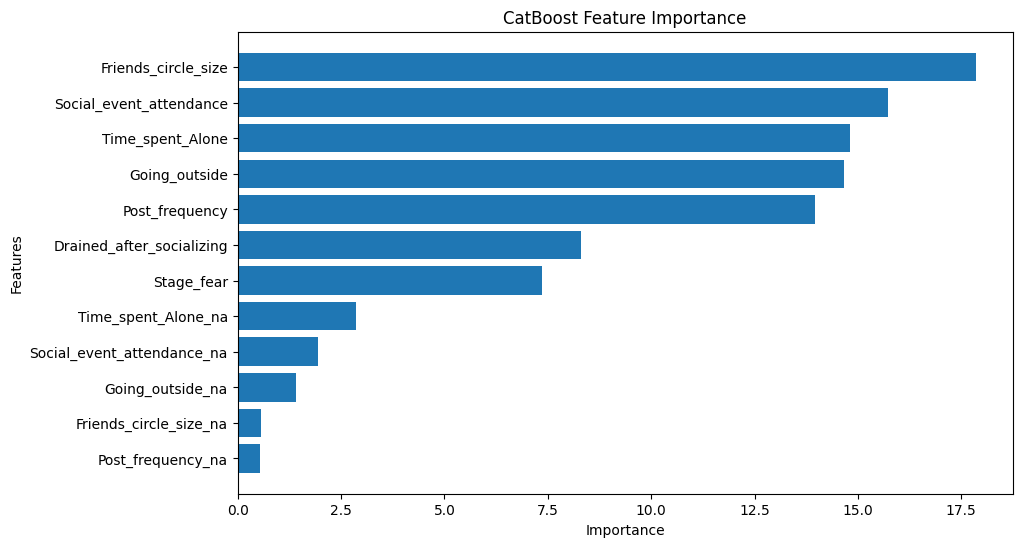

In [72]:
#importances = cat_model.get_feature_importance(type='PredictionValuesChange')
importances = cat_model.get_feature_importance()
feature_importances = pd.Series(importances, index=X_train.columns).sort_values()
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [73]:
#!rm submission.csv
#mapping = dict(enumerate(dls.vocab))
##submit = pd.read_csv(path/'sample_submission.csv')
#submit['Personality'] = [mapping[pred.item()] for pred in cat_preds]
#submit.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#print(sub)

## Ranking

In [74]:
accuracy = pd.DataFrame({
    'algorithm': ['Random Forest',
                  'RF CV','XGBoost','XGBoost CV','LGBM','LGBM CV','CatBoost','CatBoost CV',
                 ],
    'accuracy': [rf_mean_score,rf_score,xgb_score,xgb_mean_score,lgbm_score,
                 lgbm_mean_score,cat_score,cat_mean_score,
           ]
})

accuracy_sorted = accuracy.sort_values(by='accuracy', ascending=False)
accuracy_sorted

,algorithm,accuracy
1,RF CV,0.975972
4,LGBM,0.975702
6,CatBoost,0.975432
2,XGBoost,0.974622
5,LGBM CV,0.966802
0,Random Forest,0.966127
7,CatBoost CV,0.966059
3,XGBoost CV,0.964777
